# Lab 7
In this lab we will be working with classification and clustering models.


In [ ]:
!pip install scikit-learn 
!pip install pandas
!pip install matplotlib
!pip install seaborn


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns

## Get your Data and Analyse

For this lab, we use the Titanic Dataset to train different types of classification models and analyze their differences, effectiveness, and decision-making processes. 
This dataset includes a set of features - e.g. age, deck,... - inlcuding a label on whether they survived on the titanic. We will use the dataset to train classification models that are trying to find patterns in the features of the data to predic one of the labels - for instance whether they survived or not.

First, we need to analyse and preprocess our data.

### Step 1
We start by loading and inspecting the dataset to understand its structure, identify missing values, and explore feature distributions.

In [33]:
# load the Titanic Dataset
titanic = sns.load_dataset('titanic')

# print(titanic.info())
# print(titanic.describe(include='all'))
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


We can use Seaborn to visualize the distribution of missing data points. This helps in deciding how to handle them before training models.

If you find a lot of missing data in a column, think about what to do with it:

    - Drop the column if too much data is missing, making it unreliable.
    - Fill missing values using mean, median, mode, or another method.
    - Drop rows if only a few values are missing and won’t affect the dataset significantly.

Complete the code below to inspect missing data.

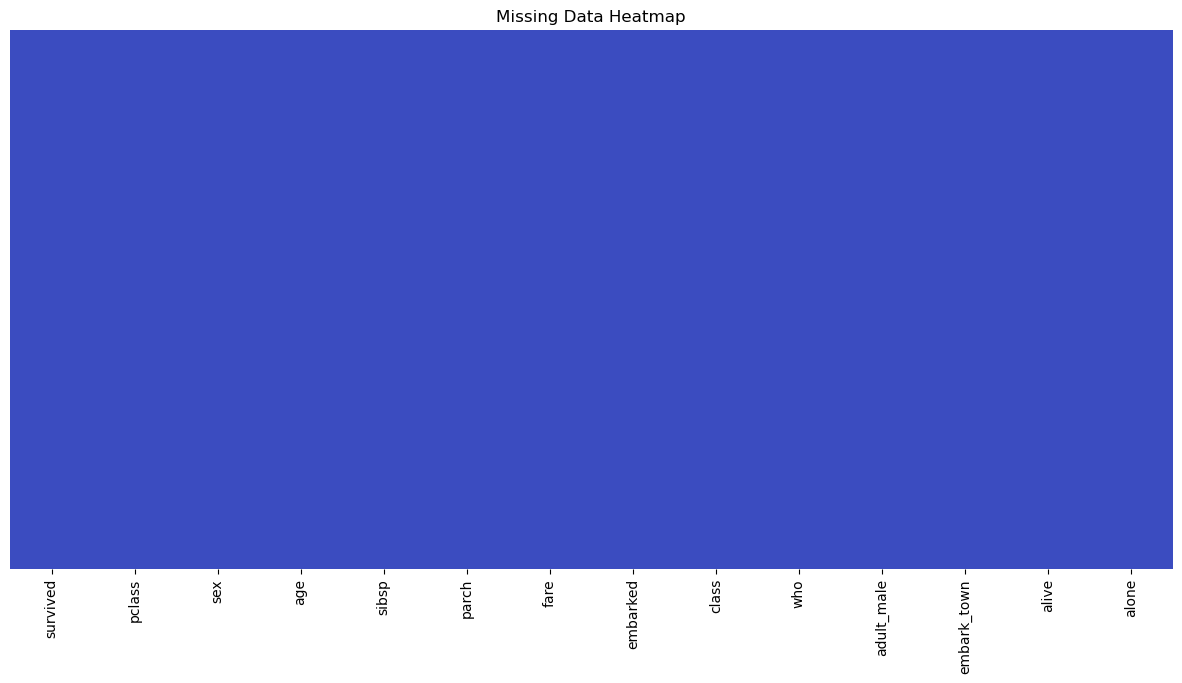

In [36]:
plt.figure(figsize=(15, 7))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='coolwarm') # complete the code -> visualise the missing values
plt.title('Missing Data Heatmap')
plt.show()

*Handle Missing Data:*

Look at the heatmap and decide:

    - Which columns have too much missing data and should be removed?
    
    - Which columns should be filled, and with what method (mean, median, mode)? Look into: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate

Modify the code below based on your decisions.

In [35]:
# Drop columns or fill missing values based on your analysis
# Example: Drop colomn because it's mostly empty
# Example: Fill columns withfew missing values with median/mode

# YOUR CODE HERE

age_mean = np.mean(titanic['age'])
embarked_mode =np.array(titanic['embarked'].mode())[0]
titanic['embarked'] = titanic['embarked'].fillna(embarked_mode)
titanic['embark_town'] = titanic['embark_town'].fillna(embarked_mode)
titanic['age'] = titanic['age'].fillna(age_mean)
titanic.drop(columns=['deck'], inplace=True)



titanic_cleaned = ... #complete


Next, we'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [39]:
titanic_preprocessed = pd.get_dummies(titanic, columns=["sex","embarked","class","who","embark_town","alive"], drop_first=True)
# what does this do? explain by showing new dataframe!

titanic_preprocessed.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,embark_town_Queenstown,embark_town_S,embark_town_Southampton,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,True,False,True,False,True,True,False,False,False,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,False,False,False,True,False,False,False,True
2,1,3,26.0,0,0,7.9250,False,True,False,False,True,False,True,False,True,False,False,True,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,True,False,False,False,True,False,False,True,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,True,False,True,True,False,False,False,True,False


Next, we want to evaluate which features in the dataset are relevant for classification. Understanding feature relationships helps in making informed choices about which variables to include in the model.

Try out different statistical analyses to explore possible research questions. Look for interesting relationships you could investigate.

To do that, you could:

    - Plot the covariances between all numerical features in a heatmap.
    - Check correlations to see which variables are strongly linked to survival.
    - Pick several subgroups (e.g., based on class, age, or gender) to analyze differences.

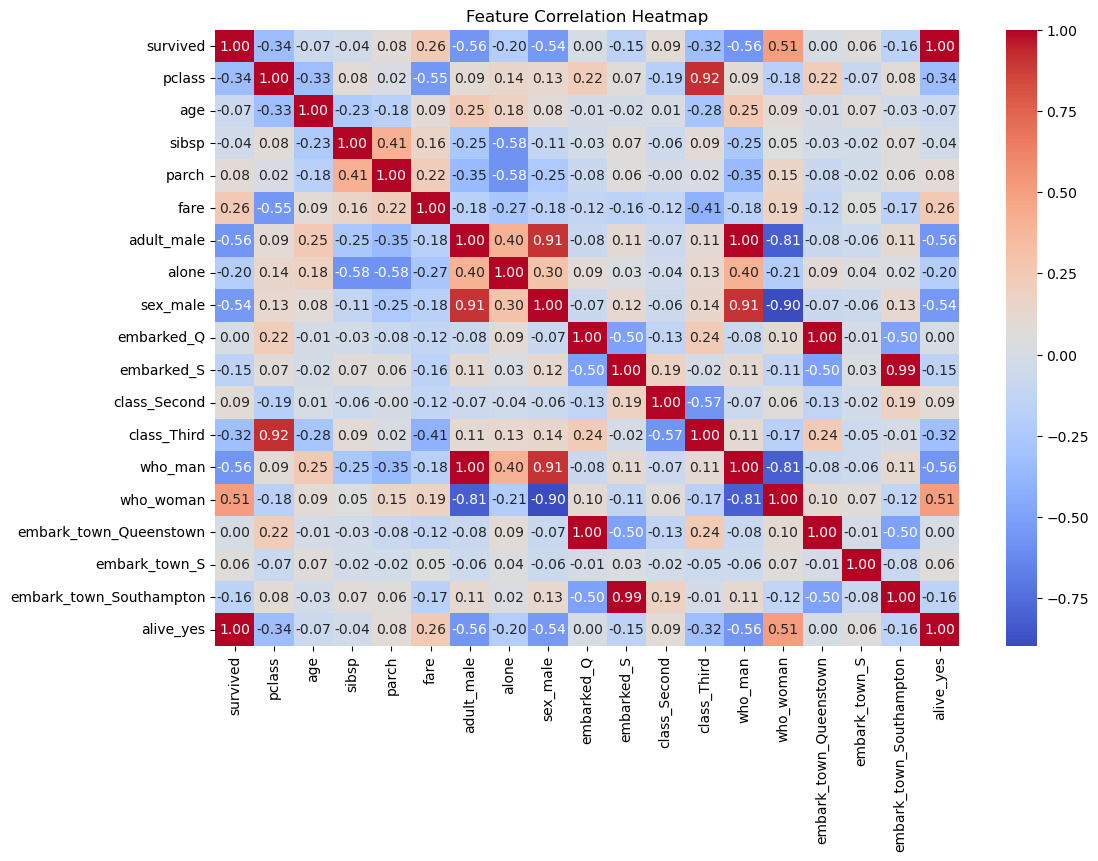

In [42]:
# as an example, try plotting the correlation matrix between all numerical features to see which ones would be good predictors/most interesting to look at
plt.figure(figsize=(12, 8))
#sns.heatmap(titanic.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f") # this is only plotting the correlation between numerical features, alternatively you could try converting categorical features to numerical ones to plot all features
sns.heatmap(titanic_preprocessed.corr(), cmap='coolwarm', annot=True, fmt=".2f") # this is for the converted features into numeric values, explain the
plt.title('Feature Correlation Heatmap')
plt.show()

Look at the heatmap and think about:

    - Which features have the strongest correlation with survival?
    - Do certain groups (e.g., male vs. female, first-class vs. third-class) show different trends?
    - Are there redundant features that might not add value?

Based on this, think about whether you want to remove certain features from your classification or combine features to create new, more meaningful variables. Some features might be highly correlated and not add much new information, while others might interact in ways that improve classification performance.

Once you've selected the most relevant features, the next step is to prepare your data for modeling, ensuring it's in the right format for classification algorithms.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X1 = titanic_preprocessed[['who_woman', 'who_man', 'pclass', 'class_Third']]  # complete with the features you want to use/ or alternatively use all of your preprocessed ones
y = titanic_preprocessed['survived']  # ADD target variable (the feature you want to predict)
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
# Apply StandardScaler if needed (for SVM, Logistic Regression, K-Means)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Classification 1 - SVM
At first, we will train and test Support Vector Machine Classifiers on your three preprocessed training datasets and evaluate their performance on predicting the survival rate on the titanic.

In [76]:
# create a Support Vector Classifier for your classification task

# train the model
clf = SVC(kernel='linear', C=1.0)
#clf.fit(x_train, y)
clf.fit(x_train_scaled, y_train)


SVC(kernel='linear')

In [77]:
# evaluate your test performance in terms of accuracy - using accuracy_score
y_pred = clf.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7877094972067039


## Task 2 - Logistic Regression
Now, we will train and test Logistic Regression Classifiers on your three preprocessed training datasets and evaluate their performance on predicting the survival rate on the titanic.

In [78]:
from sklearn import linear_model

# create a Logistic Regression Classifier

# train the model
lr_clf = linear_model.LogisticRegression()
lr_clf.fit(x_train_scaled, y_train)



LogisticRegression()

In [79]:
# evaluate your test performance
# evaluate your test performance in terms of accuracy - using accuracy_score
y_pred = lr_clf.predict(x_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_accuracy)

Accuracy: 0.776536312849162


## Task 3 - Random Forest
Now, we will train and test Random Forest Classifiers on your three preprocessed training datasets and evaluate their performance on predicting the survival rate on the titanic.

In [80]:
# create a Random Forest Classifier

# train the model
rf_clf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
rf_clf.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [81]:
# evaluate your test performance

y_pred = rf_clf.predict(x_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

Accuracy: 0.776536312849162


## Analyse your different model performances

As so far, we are dealing with labelled data, we can calculate the performance of the different models to analyse different performances.

In [82]:
table = pd.DataFrame({
    "model":['random forest',
             'logistic regression',
             'SVM'
            ],
    "accuracy":[rf_accuracy,
                lr_accuracy,
                accuracy
               ]
})
table

,model,accuracy
0,random forest,0.776536
1,logistic regression,0.776536
2,SVM,0.787709


ValueError: Per-column arrays must each be 1-dimensional

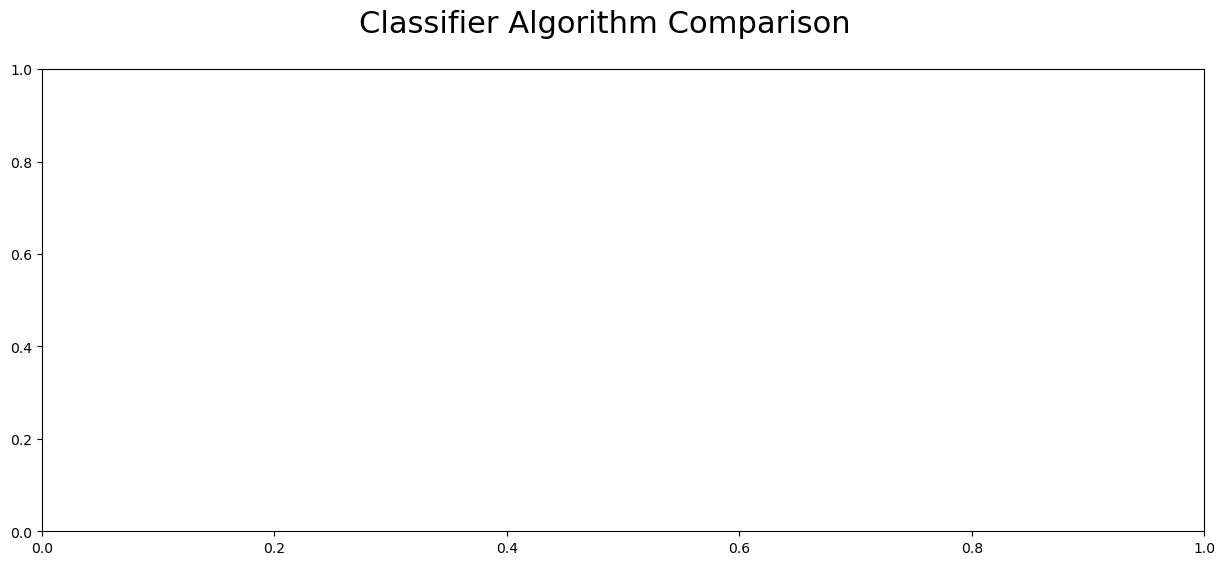

In [74]:
# First, plot the accuracy performance of each model using a comparative boxplot  
# Boxplot for algorithm comparison  
fig = plt.figure(figsize=(15,6))  
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)  
ax = fig.add_subplot(111)  

sns.boxplot(x=x_test_scaled, y=y_pred)  # Add data  

ax.set_xticklabels(...)  # Add labels  
ax.set_xlabel("Algorithm", fontsize=20)  
ax.set_ylabel("Accuracy of Models", fontsize=18)  
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  

plt.show()

For a more in-depth analysis:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate and print evaluation metrics for each model
# accuracy_model1 = ...
# precision_model1 = ...
# recall_model1 = ...
# f1_model1 = ...
# print(...)

# Plot confusion matrix for each of the models
# cm_model1 = ...
# cm_model2 = ...
# cm_model3 = ...

# Visualize confusion matrix using seaborn heatmap
# plt.figure(figsize=(6,4))
# sns.heatmap(..., annot=True, fmt='d', cmap='Blues')
# plt.title(...)
# plt.xlabel(...)
# plt.ylabel(...)
# plt.show()

# Plot ROC curve for each model
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, _ = ...
# roc_auc = ...
# plt.plot(...)

# Plot Precision-Recall curve
# from sklearn.metrics import precision_recall_curve
# precision, recall, _ = ...
# plt.plot(...)

# Compare models based on evaluation metrics
# print(...)


What does this analysis tell you? Which or your trained models are performing best, for which of your specific tasks? Can you guess why?

## Task 4 - Clustering: K-Means
K-Means is a clustering algorithm that groups unlabeled data into clusters based on similarity. It tries to find meaningful patterns in the data without any predefined categories.

In this exercise, you will:

    - Generate or select data for clustering.
    - Apply K-Means with different values of k (the number of clusters).
    - Analyze the results to understand how the choice of k affects clustering.

Since we don't have labels, we don't know the best value of k in advance. You will experiment with different values and evaluate the results.

You should use the function *KMeans* in **sklearn.cluster** https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

For your reference, here is a tutorial on k-means and Python:

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [83]:
from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt

Let's generate 100 random values from a 2-d multivariate normal distribution. This is a distribution with just one peak - in other words, we will assume all data are from the same class.

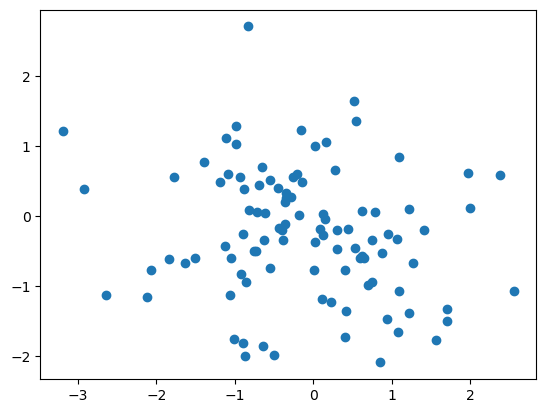

In [84]:
nbpts1 = 100
mu1 = [0, 0]  # the mean of the first cluster (this is a vector as we are in 2D)
sigma1 = [[1, 0], [0, 1]]  # the covariance matrix of the first cluster -- this one is not correlated
data = np.random.multivariate_normal(mu1, sigma1, nbpts1)
plt.scatter(data[:, 0], data[:, 1])

Apply k-means with k taking values from 5 to 1. For each k, plot the final clustering to see what has happened. Plot the centroids too. Which value of k is best? Does that make sense?

c:\Users\eliya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eliya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eliya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eliya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

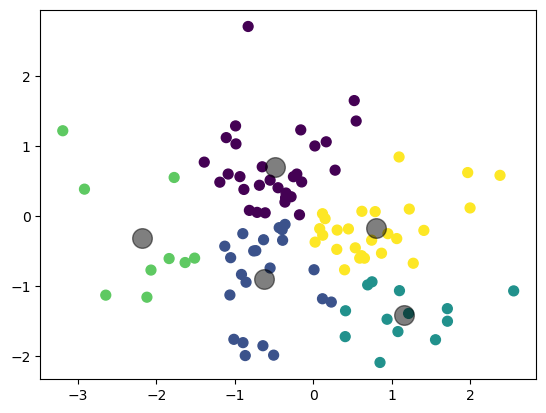

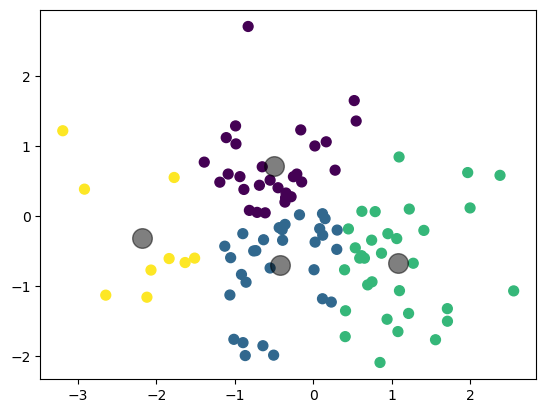

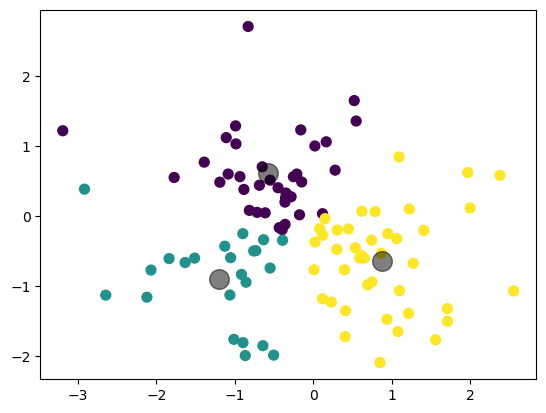

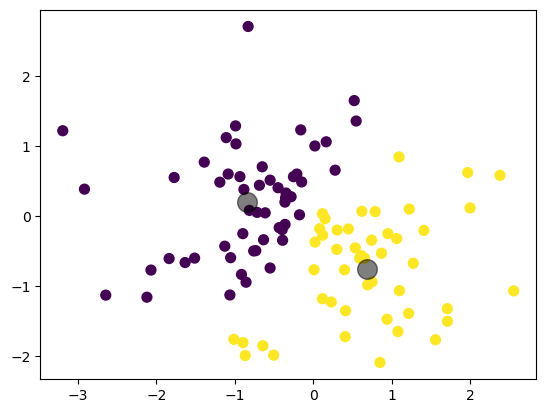

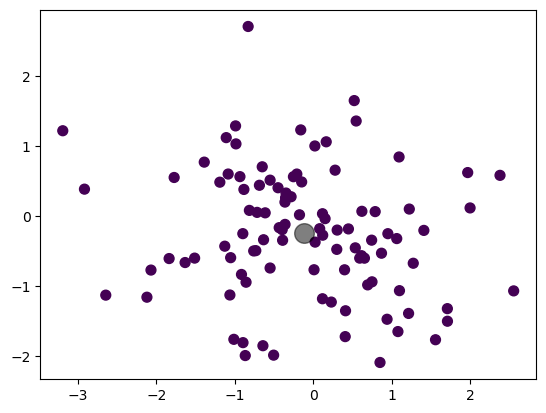

In [87]:
# HINT: You can use the following code, where idx is an array containing the class labels
# obtained from the k-means algorithm.
# This code is used in the tutorial referred to above.
for k in np.arange(5, 0, -1):

    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)  # Fit KMeans model with k cluster
    idx = kmeans.predict(data)  # Predict class membership
    plt.figure(k)
    plt.scatter(data[:, 0], data[:, 1], c=idx, s=50, cmap='viridis')
    C = kmeans.cluster_centers_
    plt.scatter(C[:, 0], C[:, 1], c='black', s=200, alpha=0.5)  # Plotting centroids

plt.show()

The elbow method helps determine the best number of clusters (k) for K-Means:

In [99]:
k_values = range(1, 5)  # Define k values from 1 to 10
wcss = []  # Initialize an empty list to store WCSS values

for k in k_values:
	kmeans = KMeans(n_clusters=k, random_state=0)
	kmeans.fit(data)
	wcss.append(kmeans.inertia_)  # Append the WCSS for each k

c:\Users\eliya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eliya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eliya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eliya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

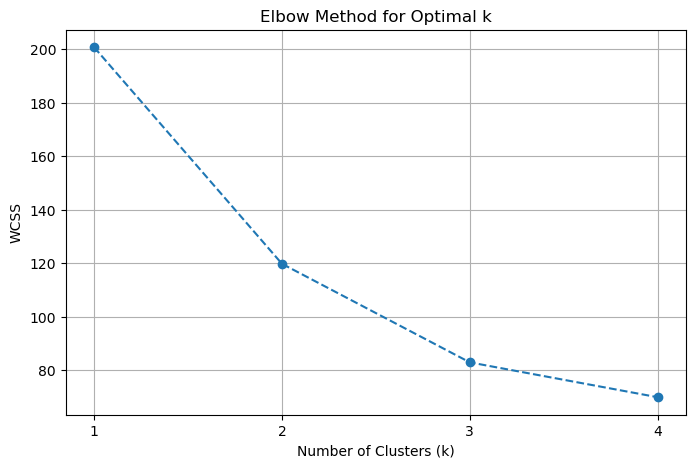

In [100]:
# Within-Cluster Sum of Squares (WCSS) -> total varience in cluster - sum of the squared distances between each data point and the centroid of the cluster it belongs to
# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid()
plt.show()

Extention Task: Now, apply clustering on either your own data or a datset from Kaggle(e.g. the Iris Dataset)